In [1]:
# 顯示設定：多重執行輸出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd ## 套件縮名的用法

In [3]:
## 資料來源： 證交所 個股日成交資訊 - http://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
#  資料期間：　2018　1 月
#     1707 => 葡萄王,
#     2201 => 裕隆, 
#     2303 => 聯電, 
#     2330 => 台積電, 
#     2882 => 國泰金, 

##　去除不要的資訊
def getMergeData(stock_id_list, col_name):
    merge_data = pd.DataFrame(columns=["日期"])
    for stock_id in stock_id_list:
        target_df = pd.read_csv("./data/finance/107_01_%s.csv"%stock_id).drop(["Unnamed: 0", "Unnamed: 9"], axis=1).dropna()
        target_df = target_df[['日期', col_name]].rename(columns={col_name: stock_id})
        merge_data = pd.merge(merge_data, target_df, on=["日期"], how="outer")
    return merge_data

stock_id_list = ["1707", "2201", "2303", "2330", "2882"]
portfolio = getMergeData(stock_id_list, "收盤價")
portfolio.head()

日期   1707   2201   2303   2330  2882
0  107/01/02  212.5  23.95  14.25  232.5  54.2
1  107/01/03  216.5  23.65  14.40  237.0  55.2
2  107/01/04  219.0  23.40  14.35  239.5  55.4
3  107/01/05  218.5  23.50  14.55  240.0  55.7
4  107/01/08  220.0  23.65  14.70  242.0  55.7

# 1. 線圖 line

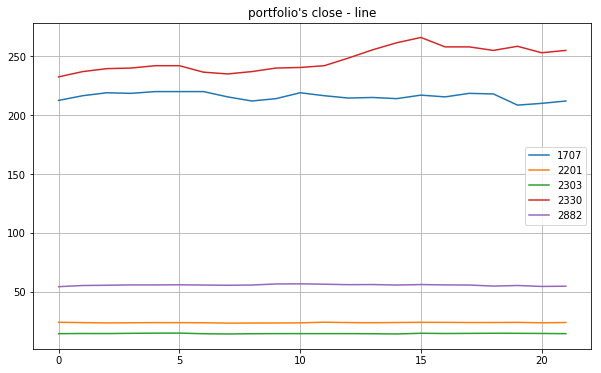

In [5]:
portfolio.plot(kind='line', 
               figsize=(10,6), 
               title="portfolio's close - line", 
               grid=True)

# 2. 長條圖 bar

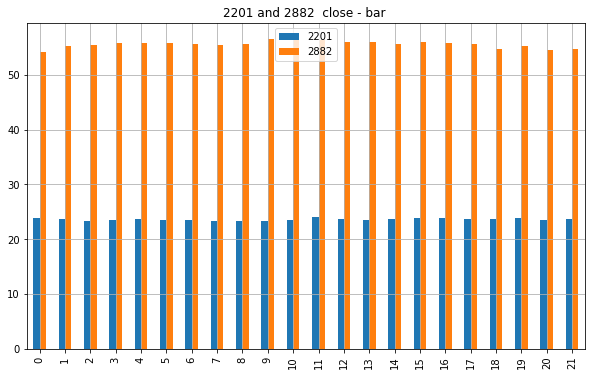

In [6]:
portfolio.plot(y=["2201", "2882"], 
               kind='bar', 
               figsize=(10,6), 
               title="2201 and 2882  close - bar ", 
               grid=True)

# 3. 直方圖 hist

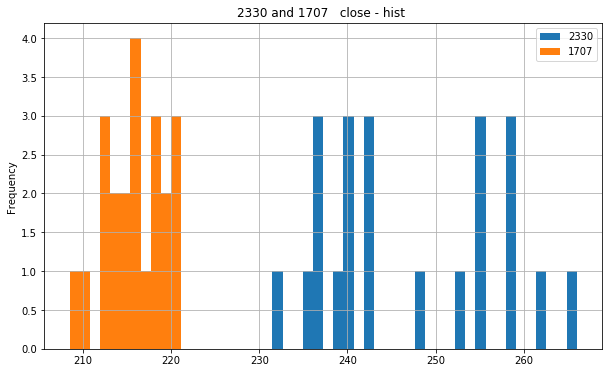

In [7]:
#bins 為組數
portfolio.plot(y=["2330", "1707"], 
                kind='hist', 
               figsize=(10,6), 
               title="2330 and 1707   close - hist ", 
               bins=50,
               grid=True)

# 4. 盒鬚圖 box

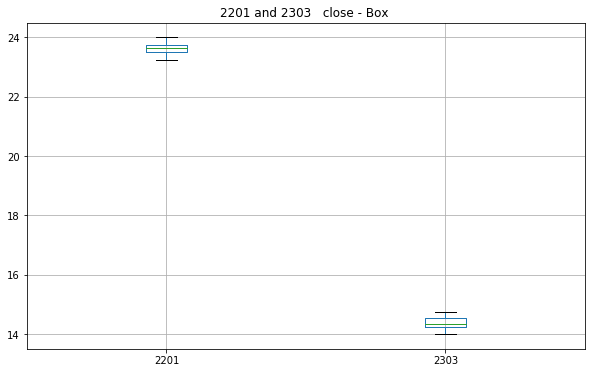

In [8]:
portfolio.plot(y=["2201", "2303"], 
                kind='Box', 
               figsize=(10,6), 
               title="2201 and 2303   close - Box ", 
               grid=True)

# 5. 散佈圖 scatter

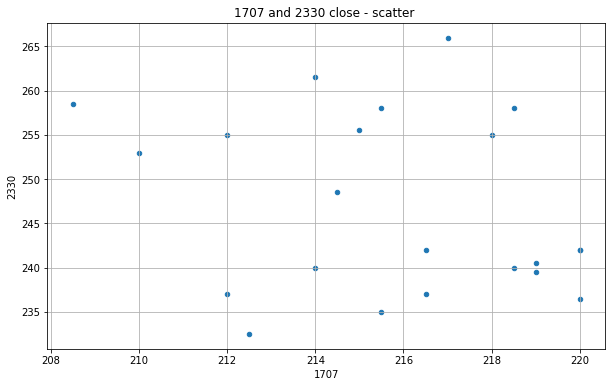

In [9]:
portfolio.plot(x="1707",
               y="2330",
               kind='scatter',
               figsize=(10,6),
               title="1707 and 2330 close - scatter ", 
               grid=True)

# 6. 相關係數圖

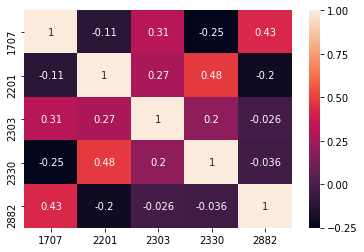

In [10]:
import seaborn as sns
sns.heatmap(portfolio.corr(),annot=True)